# Partie I

Objectifs :
- Créer un jeu de données ;
- Mettre le texte en minuscule ;
- Suppression de la ponctuation ;
- Séparation en tokens ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot ;
- Suppression des stopwords ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après supression des stopwords ;
- Création d'une version avec stemming du document ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après le stemming ;
- Création d'une version avec lemmatization du document ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après la lemmatization ;


## Importations des packages

In [63]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

from collections import Counter

import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Importations des données

Les données sont issue de [cette base de données](https://cs.nyu.edu/~kcho/DMQA/).

Maintenant que nos outils sont chargés, nous allons charger nos données.

Cliquez sur le lien ci-dessous :

https://drive.google.com/drive/folders/12OmusfAUOcoLOCwEc--nfkKQ5eEozU45?usp=sharing

Cliquer droit sur le dossier data et appuyer sur ajouter à mon drive.

In [64]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Les données sont maintenant dans votre environnement collab.

In [65]:
import os
print(os.listdir('gdrive/MyDrive/Exercice_1/Partie_1')[:10])

['0a0a4c90d59df9e36ffec4ba306b4f20f3ba4acb.story', '0a3ff2f0a147c158845afa44d2a012064896566b.story', '0a3fff5779a8f7cfdde5d284a429ab89fd5e85df.story', '0a0f56ebc5a0a67ed18de79d99b40a42d8058d04.story', '0a3ad75d92c5bc2eccf2763df86afe5ddeffed75.story', '0a3f2400ba4e5cdf4b3638ae6fb60fdfa12a2680.story', '0a3f567efff9f0748b2758c9e8c17dc66beade04.story', '0a05b14962b2e73bbff82086762e0e23d32b359f.story', '0a1ad82d161d90d758240407cb8c8fcebff4a212.story', '0a4ec4d37683347ca62b53982d2c5f4efb86f444.story']


## Création de la base de données

In [66]:
# Monter Google Drive
data_path = 'gdrive/MyDrive/Exercice_1/Partie_1'

# Charger et afficher les 10 premiers fichiers
files = os.listdir(data_path)[:10]
print("Fichiers disponibles :", files)

# Lire un fichier texte pour créer une base de données
with open(os.path.join(data_path, files[0]), 'r', encoding='utf-8') as file:
    text_data = file.read()

print("Exemple de contenu :", text_data[:500])  # Afficher les 500 premiers caractères


Fichiers disponibles : ['0a0a4c90d59df9e36ffec4ba306b4f20f3ba4acb.story', '0a3ff2f0a147c158845afa44d2a012064896566b.story', '0a3fff5779a8f7cfdde5d284a429ab89fd5e85df.story', '0a0f56ebc5a0a67ed18de79d99b40a42d8058d04.story', '0a3ad75d92c5bc2eccf2763df86afe5ddeffed75.story', '0a3f2400ba4e5cdf4b3638ae6fb60fdfa12a2680.story', '0a3f567efff9f0748b2758c9e8c17dc66beade04.story', '0a05b14962b2e73bbff82086762e0e23d32b359f.story', '0a1ad82d161d90d758240407cb8c8fcebff4a212.story', '0a4ec4d37683347ca62b53982d2c5f4efb86f444.story']
Exemple de contenu : (CNN) -- Can a movie actually convince you to support torture? Can a movie really persuade you that "fracking" -- a process used to drill for natural gas -- is a danger to the environment? Can a movie truly cause you to view certain minority groups in a negative light?

Some scoff at the notion that movies do anything more than entertain. They are wrong. Sure, it's unlikely that one movie alone will change your views on issues of magnitude. But a movi


## En minuscule

In [67]:
# Mise en minuscule
text_lower = text_data.lower()
print("Texte en minuscule :", text_lower[:500])

Texte en minuscule : (cnn) -- can a movie actually convince you to support torture? can a movie really persuade you that "fracking" -- a process used to drill for natural gas -- is a danger to the environment? can a movie truly cause you to view certain minority groups in a negative light?

some scoff at the notion that movies do anything more than entertain. they are wrong. sure, it's unlikely that one movie alone will change your views on issues of magnitude. but a movie (or tv show) can begin your "education" or 


## Suppresion de la ponctuaction

In [68]:
# Suppression de la ponctuation
text_no_punctuation = text_lower.translate(str.maketrans('', '', string.punctuation))
print("Texte sans ponctuation :", text_no_punctuation[:500])

Texte sans ponctuation : cnn  can a movie actually convince you to support torture can a movie really persuade you that fracking  a process used to drill for natural gas  is a danger to the environment can a movie truly cause you to view certain minority groups in a negative light

some scoff at the notion that movies do anything more than entertain they are wrong sure its unlikely that one movie alone will change your views on issues of magnitude but a movie or tv show can begin your education or miseducation on a topi


## Tokenization

In [69]:
# Tokenisation
tokens = word_tokenize(text_lower)
tokens = word_tokenize(text_no_punctuation)
print("Exemple de tokens :", tokens[:20])

Exemple de tokens : ['cnn', 'can', 'a', 'movie', 'actually', 'convince', 'you', 'to', 'support', 'torture', 'can', 'a', 'movie', 'really', 'persuade', 'you', 'that', 'fracking', 'a', 'process']


## Visualization du vocabulaire

Vocabulaire le plus fréquent : [('the', 43), ('of', 23), ('to', 22), ('and', 21), ('that', 20), ('a', 16), ('in', 13), ('on', 11), ('films', 10), ('can', 9), ('are', 9), ('you', 8), ('as', 8), ('movie', 7), ('torture', 7), ('or', 7), ('for', 6), ('is', 6), ('they', 6), ('it', 6)]


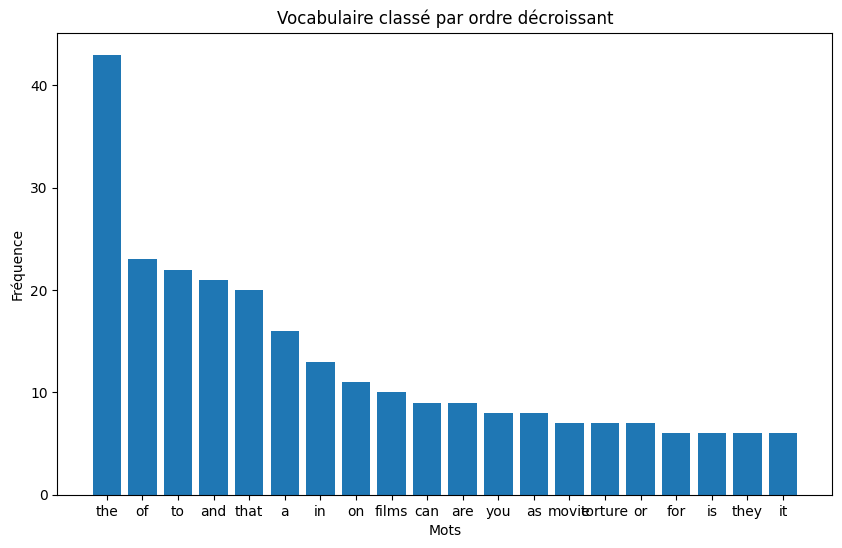

In [70]:
# Comptage des tokens
vocab_counter = Counter(tokens)

# Vocabulaire classé par ordre décroissant
vocab_sorted = vocab_counter.most_common(20)
print("Vocabulaire le plus fréquent :", vocab_sorted)

# Visualisation
plt.figure(figsize=(10, 6))
plt.bar(*zip(*vocab_sorted))
plt.title("Vocabulaire classé par ordre décroissant")
plt.ylabel("Fréquence")
plt.xlabel("Mots")
plt.show()

## Les stopwords

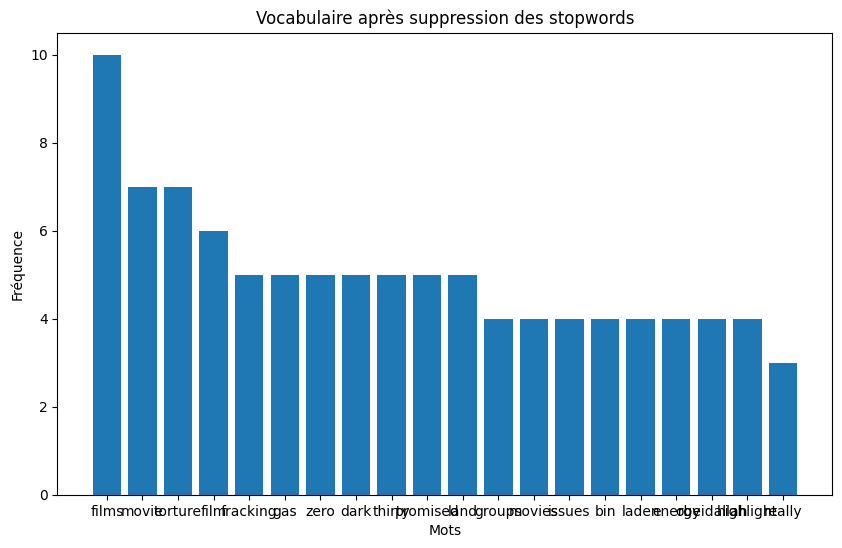

In [71]:
stop_words = set(stopwords.words('english'))

# Filtrage des stopwords
filtered_tokens = [token for token in tokens if token not in stop_words]

# Comptage et visualisation
filtered_vocab_counter = Counter(filtered_tokens)
filtered_vocab_sorted = filtered_vocab_counter.most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*filtered_vocab_sorted))
plt.title("Vocabulaire après suppression des stopwords")
plt.ylabel("Fréquence")
plt.xlabel("Mots")
plt.show()

## Stemming

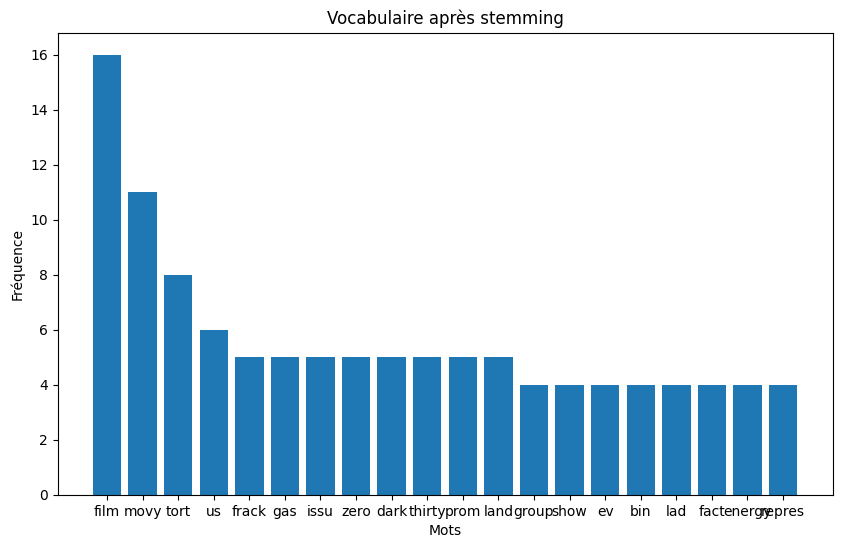

In [72]:
# Appliquer le stemming
stemmer = LancasterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# Comptage et visualisation
stemmed_vocab_counter = Counter(stemmed_tokens)
stemmed_vocab_sorted = stemmed_vocab_counter.most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*stemmed_vocab_sorted))
plt.title("Vocabulaire après stemming")
plt.ylabel("Fréquence")
plt.xlabel("Mots")
plt.show()

## Lemmatization

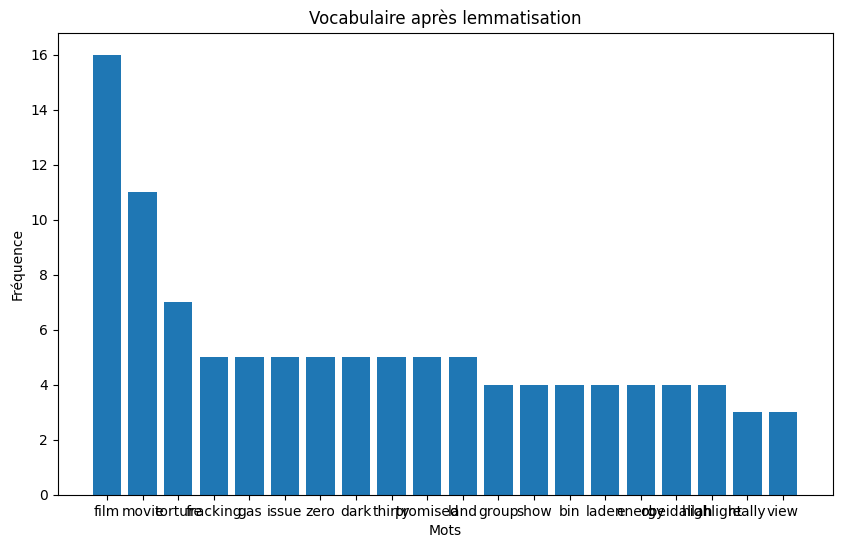

In [73]:
# Appliquer la lemmatisation
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Comptage et visualisation
lemmatized_vocab_counter = Counter(lemmatized_tokens)
lemmatized_vocab_sorted = lemmatized_vocab_counter.most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*lemmatized_vocab_sorted))
plt.title("Vocabulaire après lemmatisation")
plt.ylabel("Fréquence")
plt.xlabel("Mots")
plt.show()

# Partie II - Détecter le language du texte grâce au stopwords

Les stopwords sont les mots les plus utilisés dans un texte grâce à eux essayé de prédire la langue du texte.

Prédire pour cinq languages :
- Français ;
- Anglais ;
- Espagnol ;
- Italien ;
- Russe.

Vérifier le nombre de stopwords de chaque langue dans un texte. La langue prédit sera celle avec le plus de stopwords.

Vous pourrez trouver de l'aide via ce [lien](https://www.nltk.org/book/ch02.html).


## Importation des données

Les données proviennent de ce [jeux de données](https://zenodo.org/record/841984#.X_Jb2ulKjBI).

In [74]:
x_text = pd.read_csv('gdrive/MyDrive/Exercice_1/Partie_2/x_text.csv')
y_text = pd.read_csv('gdrive/MyDrive/Exercice_1/Partie_2/y_text.csv')
print(x_text.shape)
print(y_text.shape)

(2500, 1)
(2500, 1)


In [75]:
x_text.head()

,text
0,16 апреля 2009 года в Шатойском районе произош...
1,La ciudad de San Cristóbal es sede del Hospita...
2,Les supporters de l'ASM Clermont Auvergne ont ...
3,Anton (or Antonius) Maria Schyrleus (also Schy...
4,"Ralph Staub est un réalisateur, producteur, sc..."


In [76]:
lang = np.unique(y_text)
print(lang)

['english' 'french' 'italian' 'russian' 'spanish']
